# Bank marketing Data Set

<a href='http://archive.ics.uci.edu/ml/datasets/Bank+Marketing'>Data Set</a>

<a href='https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8'>Susan Li</a>

<a href='https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/'>SVM</a>

<p>Attribute Information:</p>

<p>Input variables:</p>
    
    
### bank client data:
<ol>
<li>age (numeric)</li>
<li>job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')</li>
<li>marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)</li>
<li>education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')</li>
<li>default: has credit in default? (categorical: 'no','yes','unknown')</li>
<li>housing: has housing loan? (categorical: 'no','yes','unknown')</li>
<li>loan: has personal loan? (categorical: 'no','yes','unknown')</li>
</ol>

### related with the last contact of the current campaign:
<ol>
<li value="8">contact: contact communication type (categorical: 'cellular','telephone')</li>
<li>month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')</li>
<li>day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri'</li>
<li>duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.</li>
</ol>

### other attributes:
<ol>
<li value="12">campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact).</li>
<li>pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted).</li>
<li>previous: number of contacts performed before this campaign and for this client (numeric).</li>
<li>poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success').</li>
</ol>

### social and economic context attributes
<ol>
<li value='16'>emp.var.rate: employment variation rate - quarterly indicator (numeric)</li>
<li>cons.price.idx: consumer price index - monthly indicator (numeric)</li>
<li>cons.conf.idx: consumer confidence index - monthly indicator (numeric)</li>
<li>euribor3m: euribor 3 month rate - daily indicator (numeric)</li>
<li>nr.employed: number of employees - quarterly indicator (numeric)</li>
</ol>

### Output variable (desired target):
<ol>
<li value='21'>y - has the client subscribed a term deposit? (binary: 'yes','no')</li>
</ol>

### References (to be moved)

<p>[1] [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014</p>

<p>[2] Bank Marketing Data Set, Machine Learning Repository, http://archive.ics.uci.edu/ml/datasets/Bank+Marketing, accessed: 2020-07-15</p>

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
data=pd.read_csv('bank-additional-full.csv',header=0,sep=';')
data=data.dropna()
print(data.shape)
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


### Predict variable

y — has the client subscribed a term deposit? (binary: “1”, means “Yes”, “0” means “No”) The education column of the dataset has many categories and we need to reduce the categories for a better modelling. The education column has the following categories:

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

Let us group “basic.4y”, “basic.9y” and “basic.6y” together and call them “basic”.

In [5]:
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])
data['y']=np.where(data['y'] =='yes', 1, data['y'])
data['y']=np.where(data['y'] =='no',  0, data['y'])

after grouping, this is the columns:

In [6]:
data['education'].unique()

array(['Basic', 'high.school', 'professional.course', 'unknown',
       'university.degree', 'illiterate'], dtype=object)

### Data exploration

In [11]:
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

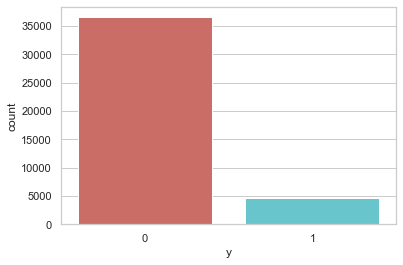

<Figure size 432x288 with 0 Axes>

In [7]:
sns.countplot(x='y',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [8]:
count_no_sub = len(data[data['y']==0])
count_sub = len(data[data['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 88.73458288821988
percentage of subscription 11.265417111780131


In [9]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


Observations: The average age of customers who bought the term deposit is higher than that of the customers who didn’t. The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale. Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit. We can calculate categorical means for other categorical variables such as education and marital status to get a more detailed sense of our data.

In [10]:
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
job,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086


In [11]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
education,,,,,,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509


In [12]:
data.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
marital,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313037,5157.393750


### Visualizations

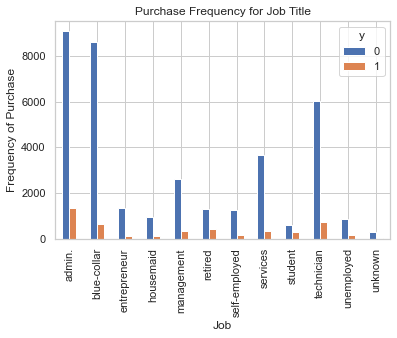

In [13]:
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

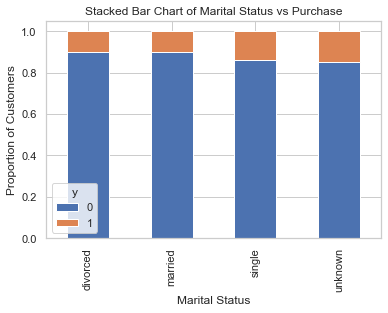

In [14]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('marital_vs_pur_stack')

The marital status does not seem a strong predictor for the outcome variable.

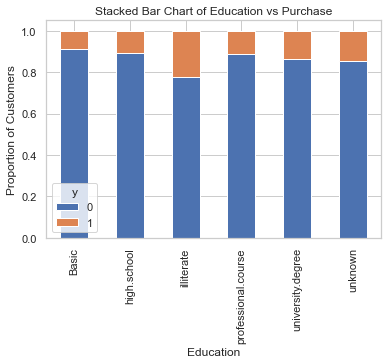

In [15]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

Education seems a good predictor of the outcome variable.

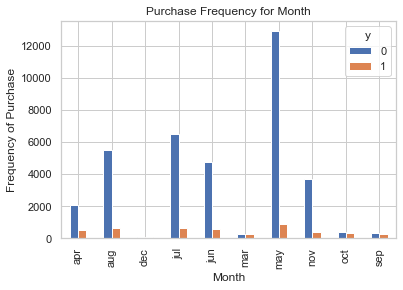

In [16]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_month_bar')

Month might be a good predictor of the outcome variable.

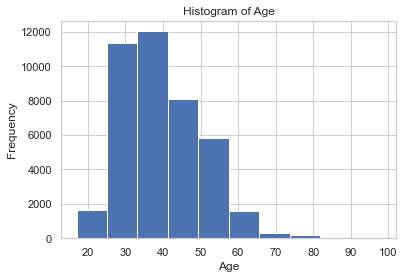

In [17]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

Most of the customers of the bank in this dataset are in the age range of 30–40

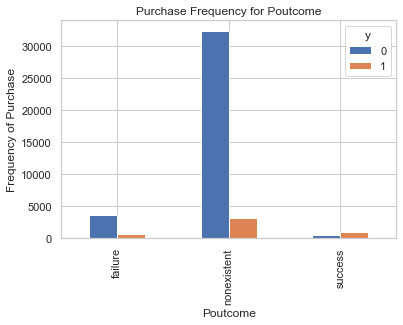

In [28]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

Poutcome seems to be a good predictor of the outcome variable.

### Create dummy variables

That is variables with only two values, zero's an one's

In [18]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
    
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [19]:
data_final=data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

### Over-sampling using SMOTE

With our training data created, I’ll up-sample the no-subscription using the SMOTE algorithm(Synthetic Minority Oversampling Technique). At a high level, SMOTE:

Works by creating synthetic samples from the minor class (no-subscription) instead of creating copies.

Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

We are going to implement SMOTE in Python.


conda install -c conda-forge imbalanced-learn

conda update --all

In [20]:
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
y_train2=y_train.astype(int)
os_data_X,os_data_y=os.fit_sample(X_train, y_train2)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  51158
Number of no subscription in oversampled data 25579
Number of subscription 25579
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


Now we have a perfect balanced data! You may have noticed that I over-sampled only on the training data, because by oversampling only on the training data, none of the information in the test data is being used to create synthetic observations, therefore, no information will bleed from test data into the model training.

### Recursive Feature Elimination

Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [21]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) 

C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Eduardo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

[False False False False False False False False False False False False
 False False False False False False False False False False  True  True
  True  True  True  True False  True  True  True False False False  True
  True  True  True  True  True False False False False False False False
 False False False False False  True  True  True  True  True False False
 False]
[38 36 33 39 32 27 29 37 31 35  9  2  5 10  8 12  6  3 13  7 11  4  1  1
  1  1  1  1 41  1  1  1 40 28 42  1  1  1  1  1  1 15 14 23 19 26 20 22
 34 21 18 25 24  1  1  1  1  1 17 16 30]


In [33]:
os_data_X.info()
print(os_data_X[os_data_X.columns[rfe.support_]])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51158 entries, 0 to 51157
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            51158 non-null  int64  
 1   duration                       51158 non-null  int64  
 2   campaign                       51158 non-null  int64  
 3   pdays                          51158 non-null  int64  
 4   previous                       51158 non-null  int64  
 5   emp.var.rate                   51158 non-null  float64
 6   cons.price.idx                 51158 non-null  float64
 7   cons.conf.idx                  51158 non-null  float64
 8   euribor3m                      51158 non-null  float64
 9   nr.employed                    51158 non-null  float64
 10  job_admin.                     51158 non-null  uint8  
 11  job_blue-collar                51158 non-null  uint8  
 12  job_entrepreneur               51158 non-null 

In [34]:
#xref=os_data_X[os_data_X.columns[rfe.support_]]
#cols=['job_blue-collar', 'job_housemaid', 'default_no', 'contact_cellular',
#      'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
#      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 
#X=os_data_X[cols]
X=os_data_X[os_data_X.columns[rfe.support_]]
y=os_data_y['y']
print(X)
print(y)

       marital_divorced  marital_married  marital_single  marital_unknown  \
0                     0                1               0                0   
1                     1                0               0                0   
2                     0                1               0                0   
3                     0                1               0                0   
4                     0                0               1                0   
...                 ...              ...             ...              ...   
51153                 0                1               0                0   
51154                 0                0               1                0   
51155                 0                1               0                0   
51156                 0                0               0                0   
51157                 0                1               0                0   

       education_Basic  education_high.school  education_professional.cours

### Implementing the model

In [35]:
import statsmodels.api as sm
logit_model=sm.Logit(y.astype(int),X.astype(int))
#z=y
#z[0:]=np.where(z[0:]=='yes',1,z[0:])
#z[0:]=np.where(z[0:]=='no',0,z[0:])
# data['target']=data['target'].replace({0:"No",1:"yes"})
#logit_model=sm.Logit(np.asarray(y),np.asarray(X))

result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.458482
         Iterations 7
                                Results: Logit
Model:                   Logit                Pseudo R-squared:     0.339     
Dependent Variable:      y                    AIC:                  46948.0131
Date:                    2020-07-19 18:07     BIC:                  47116.0240
No. Observations:        51158                Log-Likelihood:       -23455.   
Df Model:                18                   LL-Null:              -35460.   
Df Residuals:            51139                LLR p-value:          0.0000    
Converged:               1.0000               Scale:                1.0000    
No. Iterations:          7.0000                                               
------------------------------------------------------------------------------
                               Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------

C:\Users\Eduardo\anaconda3\lib\site-packages\statsmodels\base\model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


The p-values for most of the variables are smaller than 0.05, except two variables (marital_unknown and housing_no), therefore, we will remove them.

In [36]:
cols=['marital_divorced', 'marital_married', 'marital_single', 'education_Basic', 'education_high.school', 
      'education_professional.course','education_university.degree','education_unknown','housing_yes',
      'day_of_week_fri','day_of_week_mon','day_of_week_thu','day_of_week_tue','day_of_week_wed']
X=os_data_X[cols]
y=os_data_y['y']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.541841
         Iterations 6
                                Results: Logit
Model:                   Logit                Pseudo R-squared:     0.218     
Dependent Variable:      y                    AIC:                  55466.9609
Date:                    2020-07-19 18:20     BIC:                  55590.7583
No. Observations:        51158                Log-Likelihood:       -27719.   
Df Model:                13                   LL-Null:              -35460.   
Df Residuals:            51144                LLR p-value:          0.0000    
Converged:               1.0000               Scale:                1.0000    
No. Iterations:          6.0000                                               
------------------------------------------------------------------------------
                               Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------

### Logistic Regression Model fitting

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train.astype(int), y_train.astype(int))

LogisticRegression()

In [38]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test.astype(int), y_test.astype(int))))

Accuracy of logistic regression classifier on test set: 0.92


### Confusion Matrix

In [140]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test.astype(int), y_pred.astype(int))
print(confusion_matrix)

[[7632   19]
 [1191 6506]]


### Compute precision, recall, F-measure and support

To quote from Scikit Learn:
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.
The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.
The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.
The support is the number of occurrences of each class in y_test.

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test.astype(int), y_pred.astype(int)))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      7651
           1       1.00      0.85      0.91      7697

    accuracy                           0.92     15348
   macro avg       0.93      0.92      0.92     15348
weighted avg       0.93      0.92      0.92     15348



Interpretation: Of the entire test set, 93% of the promoted term deposit were the term deposit that the customers liked. Of the entire test set, 93% of the customer’s preferred term deposits that were promoted.

### ROC Curve

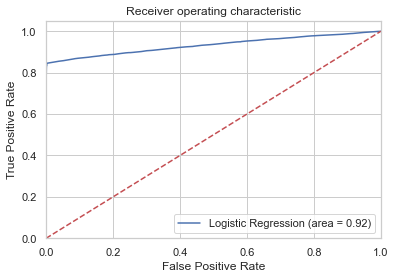

In [41]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test.astype(int), logreg.predict(X_test.astype(int)))
fpr, tpr, thresholds = roc_curve(y_test.astype(int), logreg.predict_proba(X_test.astype(int))[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

In [184]:
lr_probs1=logreg.predict_proba(X_test.astype(int))
ns_probs1 = [0 for _ in range(len(y_test))]
lr_probs1=lr_probs1[:, 1]
# calculate scores
ns_auc1 = roc_auc_score(y_test.astype(int), ns_probs1)
lr_auc1 = roc_auc_score(y_test.astype(int), lr_probs1)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc1))
print('Logistic: ROC AUC=%.3f' % (lr_auc1))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.933


# Testing

Read test data set (holdout)

In [44]:
data2=pd.read_csv('bank-additional.csv',header=0,sep=';')
data2=data2.dropna()
print(data2.shape)
print(list(data2.columns))

(4119, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [45]:
data2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [46]:
data2['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [47]:
data2['education']=np.where(data2['education'] =='basic.9y', 'Basic', data2['education'])
data2['education']=np.where(data2['education'] =='basic.6y', 'Basic', data2['education'])
data2['education']=np.where(data2['education'] =='basic.4y', 'Basic', data2['education'])
data2['y']=np.where(data2['y'] =='yes', 1, data2['y'])
data2['y']=np.where(data2['y'] =='no',  0, data2['y'])

In [48]:
data2['education'].unique()

array(['Basic', 'high.school', 'university.degree', 'professional.course',
       'unknown', 'illiterate'], dtype=object)

# Create dummy variables

In [49]:
cat_vars2=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars2:
    cat_list2='var'+'_'+var
    cat_list2 = pd.get_dummies(data2[var], prefix=var)
    data1=data2.join(cat_list2)
    data2=data1
    
cat_vars2=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars2=data2.columns.values.tolist()
to_keep2=[i for i in data_vars2 if i not in cat_vars2]

In [50]:
data_final2=data2[to_keep2]
data_final2.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [51]:
X2 = data_final2.loc[:, data_final2.columns != 'y']
y2 = data_final2.loc[:, data_final2.columns == 'y']

In [54]:
cols=['marital_divorced', 'marital_married', 'marital_single', 'education_Basic', 'education_high.school', 
      'education_professional.course','education_university.degree','education_unknown','housing_yes',
      'day_of_week_fri','day_of_week_mon','day_of_week_thu','day_of_week_tue','day_of_week_wed']
X22=X2[cols]
print(X22)

      marital_divorced  marital_married  marital_single  education_Basic  \
0                    0                1               0                1   
1                    0                0               1                0   
2                    0                1               0                0   
3                    0                1               0                1   
4                    0                1               0                0   
...                ...              ...             ...              ...   
4114                 0                1               0                1   
4115                 0                1               0                0   
4116                 0                0               1                0   
4117                 0                1               0                0   
4118                 0                0               1                0   

      education_high.school  education_professional.course  \
0                        

### Logistic Regression Model

In [57]:
y2_pred = logreg.predict(X22)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X22.astype(int), y2.astype(int))))

Accuracy of logistic regression classifier on test set: 0.89


In [56]:
print(y2_pred)

[0 0 0 ... 0 0 0]


### Classification

In [141]:
print(classification_report(y2.astype(int), y2_pred.astype(int)))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      3668
           1       0.08      0.00      0.00       451

    accuracy                           0.89      4119
   macro avg       0.49      0.50      0.47      4119
weighted avg       0.80      0.89      0.84      4119



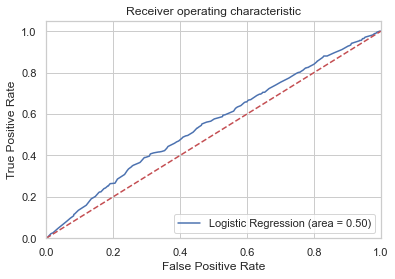

In [142]:
logit_roc_auc2 = roc_auc_score(y2.astype(int), logreg.predict(X22.astype(int)))
fpr2, tpr2, thresholds2 = roc_curve(y2.astype(int), logreg.predict_proba(X22.astype(int))[:,1])
plt.figure()
plt.plot(fpr2, tpr2, label='Logistic Regression (area = %0.2f)' % logit_roc_auc2)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [154]:
lr_probs=logreg.predict_proba(X22.astype(int))
ns_probs = [0 for _ in range(len(y2))]
lr_probs=lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y2.astype(int), ns_probs)
lr_auc = roc_auc_score(y2.astype(int), lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.553


# Counting. Prediction vs Actual

Prediction according to the model

In [182]:
sr=pd.Series(y2_pred)
sr.value_counts()

0    4107
1      12
dtype: int64

Actual value from the test data set

In [181]:
y2['y'].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [183]:
print(451/12)

37.583333333333336


There are 37.58 x more cases than the predicted.